# Практическое задание 2. Keras

Используем набор примеров fashion-MNIST

1.  Опишите - какой результата получен в нейросети в зависимости от:
  -  числа нейронов в слое(для 2-хслойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.
2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1.Фиксируйте для тренировочного и тестового набора метрики accuracy.

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

4. Для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота , точность). Сделайте вывод.

In [51]:
import numpy as np
import pandas as pd
import itertools
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

Скачаем набор данных

In [2]:
(train_imagef,train_labelf),(test_imagef,test_labelf)=fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


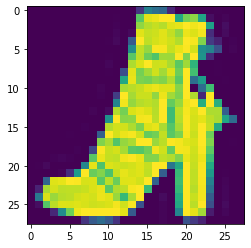

In [3]:
# plt.gray()
plt.imshow(train_imagef[11,:,:])
plt.show()

Проверим количество классов:

In [4]:
pd.Series(train_labelf).nunique()

10

Проверим диапазон цветовых значений картинок:

In [5]:
train_imagef.shape

(60000, 28, 28)

In [6]:
train_imagef.min()

0

In [7]:
train_imagef.max()


255

Отмасштабируем изображения

In [8]:
# Normalize the images.
train_imagef = (train_imagef / 127) - 1
test_imagef = (test_imagef / 127) - 1

# Flatten the images.
train_images = train_imagef.reshape((-1, 784))
test_images = test_imagef.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


Исследуем работу 2-х слойной сети в зависимости от количества нейронов во внутреннем слое. Количество нейронов будем брать - степени двойки. Проверять эффективность работы будем на метрике accuracy

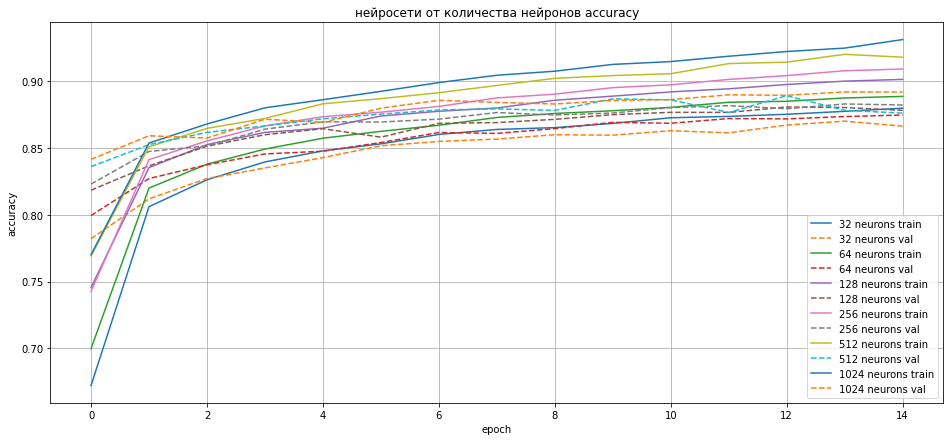

In [9]:
plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs)

for n_neurons in [32, 64, 128, 256, 512, 1024]:

    modeli = Sequential([
                      Dense(n_neurons, activation='relu', input_shape=(784,)),
                      Dense(10, activation='softmax'),
                      ])

    modeli.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
    # вычисляем ошибку для modeli без обучения
    # hh0_tr = modeli.evaluate(  train_images[:48000,:], to_categorical(train_labelf[:48000]),verbose = 0)
    # hh0_val = modeli.evaluate(  train_images[48000:,:], to_categorical(train_labelf[48000:]),verbose = 0)
    # проводим обучение модели 
    hh = modeli.fit(
                  train_images,
                  to_categorical(train_labelf),
                  epochs=epochs,
                  batch_size=1024, validation_split=0.2, verbose = 0
                  )
    # картинки
    # plt.plot(epoch,[hh0_tr[1]]+hh.history['accuracy'],'-',label = f'{n_neurons} neurons' +' train')
    # plt.plot(epoch,[hh0_val[1]]+hh.history['val_accuracy'],'--',label = f'{n_neurons} neurons' + ' val')
    plt.plot(epoch,hh.history['accuracy'],'-',label = f'{n_neurons} neurons' +' train')
    plt.plot(epoch,hh.history['val_accuracy'],'--',label = f'{n_neurons} neurons' + ' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от количества нейронов accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


Как видно, при 1024 нейронах метрика на валидационной выборке максимальна, и не имеет резких скачков по ходу обучения.

In [10]:
modeli.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1024)              803840    
                                                                 
 dense_11 (Dense)            (None, 10)                10250     
                                                                 
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


In [11]:
def evaluate_model(model):
    model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
    # проводим обучение модели 
    hh = model.fit(
                  train_images,
                  to_categorical(train_labelf),
                  epochs=epochs,
                  batch_size=1024, validation_split=0.2, verbose = 0
                  )
    print(model.summary())
    return hh.history['accuracy'], hh.history['val_accuracy']

Теперь исследуем сети с примерно одинаковым количеством весов, но с разным количеством слоев. Количество нейронов в слоях подбиралось вручную.

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1024)              803840    
                                                                 
 dense_13 (Dense)            (None, 10)                10250     
                                                                 
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 590)               463150    
                                                                 
 dense_15 (Dense)            (None, 570)               336870    
                                                                 
 dense_16 (Dense)    

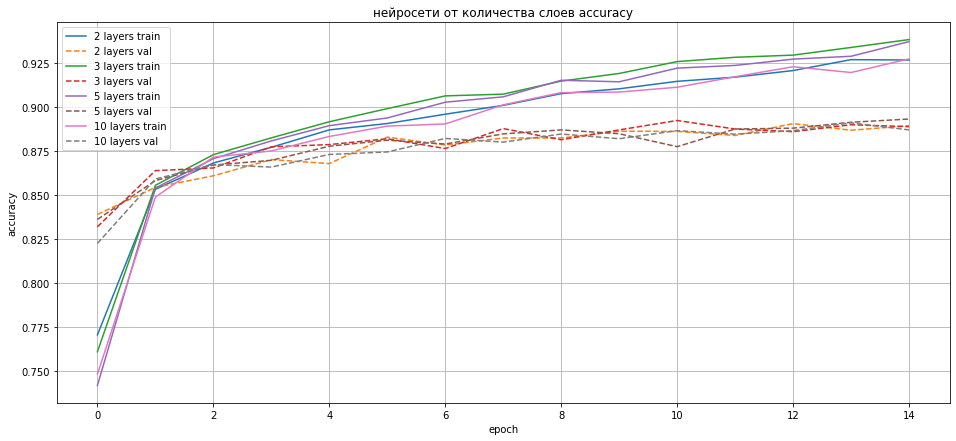

In [12]:
plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs)

model2 = Sequential([
                      Dense(1024, activation='relu', input_shape=(784,)),
                      Dense(10, activation='softmax'),
                      ])

model3 = Sequential([
                      Dense(590, activation='relu', input_shape=(784,)),
                     Dense(570, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])

model5 = Sequential([
                      Dense(420, activation='relu', input_shape=(784,)),
                     Dense(410, activation='tanh'),
                     Dense(400, activation='tanh'),
                     Dense(390, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])

model10 = Sequential([
                      Dense(290, activation='relu', input_shape=(784,)),
                     Dense(285, activation='tanh'),
                     Dense(280, activation='tanh'),
                     Dense(275, activation='tanh'),
                     Dense(270, activation='tanh'),
                     Dense(265, activation='tanh'),
                     Dense(260, activation='tanh'),
                     Dense(255, activation='tanh'),
                     Dense(250, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])

map_dict = {0: 2, 1: 3, 2: 5, 3: 10}
for idx, model in enumerate([model2, model3, model5, model10]):
    metrics = evaluate_model(model)

    plt.plot(epoch,metrics[0],'-',label = f'{map_dict[idx]} layers' +' train')
    plt.plot(epoch,metrics[1],'--',label = f'{map_dict[idx]} layers' + ' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от количества слоев accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

Видно, что при одинаковом количестве весов результаты почти одинаковы, но большую метрику на валидации дает 5-ти слойная сеть.

Теперь попробуем 5-ти слойную сеть с разными оптимизаторами.

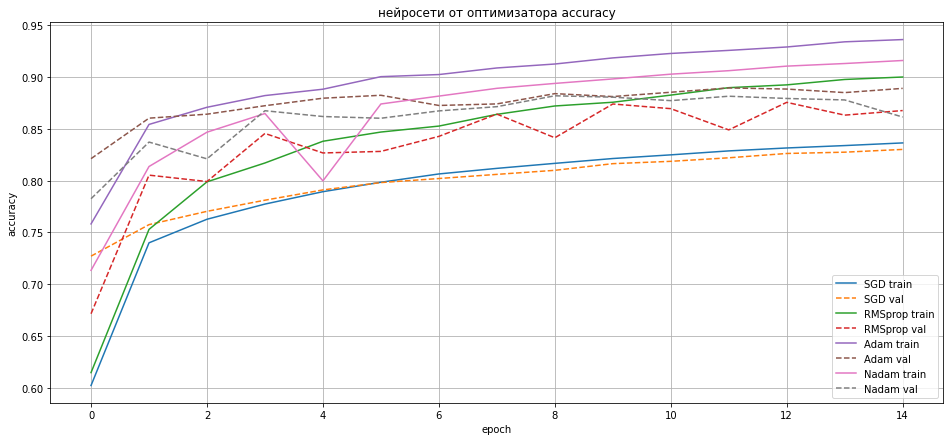

In [13]:
# создаем модель model
model = Sequential([
                      Dense(420, activation='relu', input_shape=(784,)),
                     Dense(410, activation='tanh'),
                     Dense(400, activation='tanh'),
                     Dense(390, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
# сохраняем ее веса (это начальная точка) model.save_weights('model.h5')
model.save_weights('model.h5')

plt.figure(figsize=(16,7))

# число рабочих эпох
epochs = 15
# вектор для выводв результатов
epoch = np.arange(epochs)

# будем изменять оптимизаторы

#opt_list = [keras.optimizers.SGD( ),keras.optimizers.Adam( ),keras.optimizers.Nadam( )]
for i_optim in ['SGD','RMSProp','adam','NAdam']:
  # создаем рабочую модель modeli куда будем загружать эти вес (она должна быть идентичной структуры)
    modeli = Sequential([
                      Dense(420, activation='relu', input_shape=(784,)),
                     Dense(410, activation='tanh'),
                     Dense(400, activation='tanh'),
                     Dense(390, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])
    # загружаем веса modeli.load_weights('model.h5')
    modeli.load_weights('model.h5')
    # компилируем modeli с одним из оптимизаторов
    modeli.compile(
      optimizer=i_optim,
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )
    
    # проводим обучение модели 
    hh = modeli.fit(
                  train_images,
                  to_categorical(train_labelf),
                  epochs=epochs,
                  batch_size=1024, validation_split=0.2, verbose = 0
                  )
    # картинки
    plt.plot(epoch,hh.history['accuracy'],'-',label = modeli.optimizer.get_config()['name']+' train')
    plt.plot(epoch,hh.history['val_accuracy'],'--',label = modeli.optimizer.get_config()['name']+' val')
plt.legend()
plt.grid('On')

plt.title('нейросети от оптимизатора accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


Лучшую метрику для этой задачи дает оптимизатор Adam

Теперь создадим и обучим сеть с лучшими параметрами:

In [69]:
model = Sequential([
                      Dense(420, activation='relu', input_shape=(784,)),
                     Dense(410, activation='tanh'),
                     Dense(400, activation='tanh'),
                     Dense(390, activation='tanh'),
                      Dense(10, activation='softmax'),
                      ])

model.load_weights('model.h5')

model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
      )

hh = model.fit(
            train_images,
            to_categorical(train_labelf),
            epochs=30,
            batch_size=1024, validation_split=0.2, verbose = 1
            )

Epoch 1/30
47/47 [==============================] - 5s 93ms/step - loss: 0.6348 - accuracy: 0.7675 - val_loss: 0.4490 - val_accuracy: 0.8413
Epoch 2/30
47/47 [==============================] - 4s 89ms/step - loss: 0.3911 - accuracy: 0.8582 - val_loss: 0.3775 - val_accuracy: 0.8656
Epoch 3/30
47/47 [==============================] - 4s 89ms/step - loss: 0.3496 - accuracy: 0.8719 - val_loss: 0.3832 - val_accuracy: 0.8658
Epoch 4/30
47/47 [==============================] - 4s 89ms/step - loss: 0.3224 - accuracy: 0.8807 - val_loss: 0.3416 - val_accuracy: 0.8737
Epoch 5/30
47/47 [==============================] - 4s 88ms/step - loss: 0.2954 - accuracy: 0.8911 - val_loss: 0.3453 - val_accuracy: 0.8770
Epoch 6/30
47/47 [==============================] - 4s 89ms/step - loss: 0.2790 - accuracy: 0.8969 - val_loss: 0.3388 - val_accuracy: 0.8768
Epoch 7/30
47/47 [==============================] - 4s 89ms/step - loss: 0.2643 - accuracy: 0.9025 - val_loss: 0.3493 - val_accuracy: 0.8775
Epoch 8/30
47

**Вывод - качество классификации помогает улучшить выбор гиперпараметров - как самой архитектуры сети, так и выбор оптимизатора.**

Получим из предикта целевые классы:

In [70]:
y_pred = model.predict(test_images)
y_pred_class = np.argmax(y_pred,axis=1)

Выведем по несколько картинок для каждого класса:

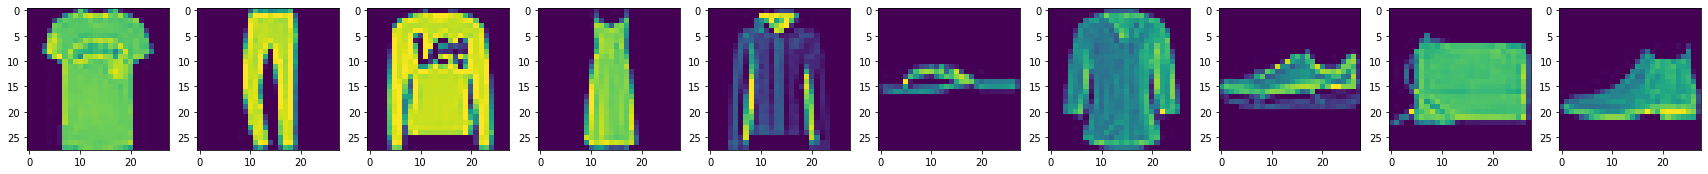

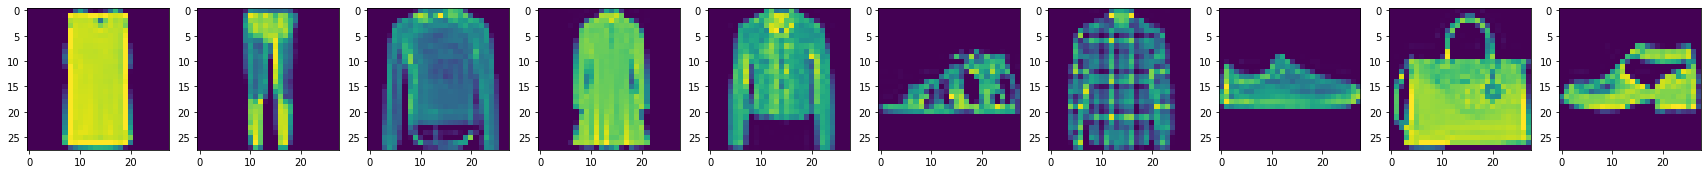

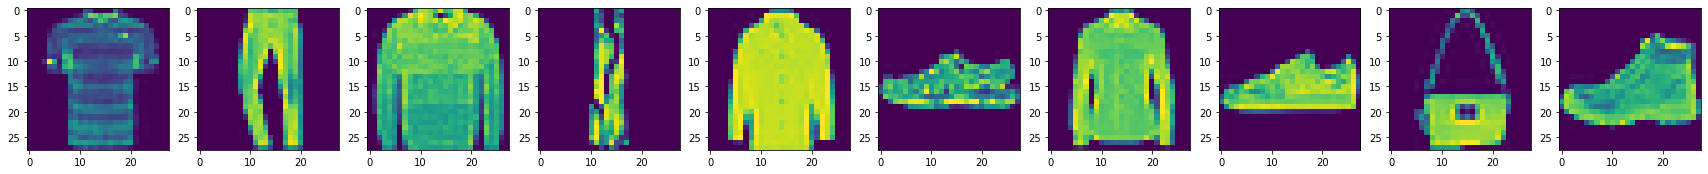

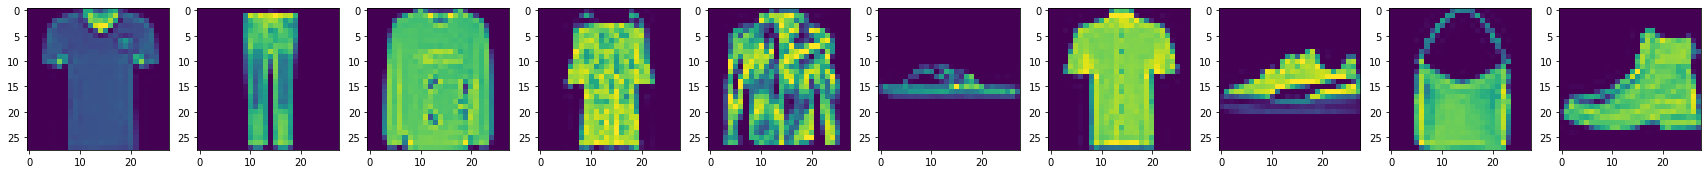

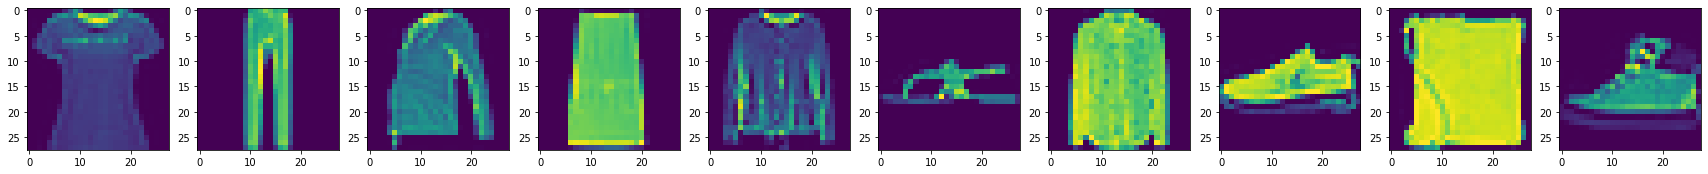

In [75]:
idx_list = []
for i in range(10):
    idx_list.append(np.where(test_labelf == i)[0])

for i in range(5):
    plt.figure(figsize =(30,25))
    for j in range(10):
        
        plt.subplot(i+1,10,j+1)
        plt.imshow(test_images[idx_list[j][i],:].reshape(28,28))
plt.show()

Видно, что категории одежды вполне узнаваемы

Теперь посмотрим матрицу ошибок по всем классам.

In [71]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


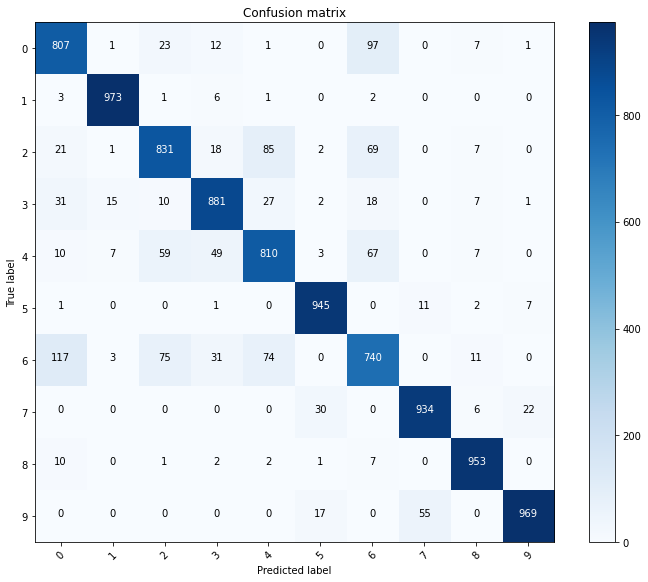

In [72]:
cnf_matrix = confusion_matrix(y_pred_class, test_labelf)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
                      title='Confusion matrix')

**Выводы по матрице ошибок:**



*   Меньше всего ошибок у 1 категории (штаны) - их трудно спутать с чем то еще
*   Удивительно, но далее идет 9 категория сапоги/ботинки. Их можно спутать с категориями 5 (сандалии/шлепки/босоножки) и 7 (кеды). Собственно, те небольшие ошибки, которые есть у этих трех категорий, связаны с путаницей между собой.
*   На третьем месте 8 категория - сумки. Их также трудно спутать с чем то еще.
*   Далее идет много путаницы между собой у категорий 0, 2, 3, 4, 6. Это футболки, кофты, платья, рубашки. В целом, все довольно логично.

Теперь рассмотрим precision и recall для каждого класса:

In [74]:
print('TEST\n\n' + classification_report(test_labelf, y_pred_class))

TEST

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.83      0.82      1000
           3       0.89      0.88      0.88      1000
           4       0.80      0.81      0.81      1000
           5       0.98      0.94      0.96      1000
           6       0.70      0.74      0.72      1000
           7       0.94      0.93      0.94      1000
           8       0.98      0.95      0.96      1000
           9       0.93      0.97      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



**Выводы по отчету классификации:**

Полнота и точность для каждого класса примерно равны. Это говорит о том, что ошибок первого и второго рода для каждого класса примерно одинаково.